<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [ ]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [ ]:
X

array([[ 0.35375589,  0.28929301,  0.48523022,  0.62203148, -1.24936153],
       [ 0.20425535,  1.60431078, -0.065753  , -0.00474915,  1.54888018],
       [-1.29765409, -0.5344866 ,  0.23614881,  0.27004474, -1.17486639],
       ...,
       [-0.04510433,  0.60958112, -0.0476168 , -0.03016537,  0.65812123],
       [-0.16984873,  0.0415595 ,  0.23741361,  0.29950873, -0.69521718],
       [ 1.29596578,  0.89516891, -0.14080382, -0.13311413,  1.18441842]])

In [ ]:
y

array([1, 0, 0, ..., 0, 0, 0])

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [ ]:
# you can write your code here

In [ ]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [ ]:

x_train.shape, x_test.shape,x_cv.shape

((3000, 5), (1000, 5), (1000, 5))

In [ ]:
clf = SVC(gamma=0.001, C=100)
clf.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

In [ ]:
clf.get_params, clf.kernel, clf.intercept_

(<bound method BaseEstimator.get_params of SVC(C=100, gamma=0.001)>,
 'rbf',
 array([-1.57646877]))

In [ ]:
# Get parameters from model
params = clf.get_params()
sv = clf.support_vectors_
nv = clf.n_support_
a  = clf.dual_coef_ # this is alpha only for support vectors, for nonsupport vectors alpha = 0
b  = clf.intercept_
cs = clf.classes_

In [ ]:
print(type(x_cv))
print(len(x_cv))
print(x_cv)

<class 'numpy.ndarray'>
1000
[[ 0.48215731  1.24143829  0.46790447  0.64640229 -0.39684066]
 [ 0.35211152 -0.36235531  0.33215966  0.39868435 -1.3256336 ]
 [-1.00159064 -0.82853651  0.13823665  0.1331221  -1.12059188]
 ...
 [ 0.82585588  0.54889609  0.29837644  0.40045354 -0.45682887]
 [ 1.26343018  1.83624705  0.6896265   0.95302406 -0.57939965]
 [-2.07298311  0.17832065  0.12230291  0.16188511 -0.22642606]]


In [ ]:
y_cv

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
print(type(cs))
print(len(cs))
print(cs)

<class 'numpy.ndarray'>
2
[0 1]


In [ ]:
print(type(b))
print(len(b))
print(b)

<class 'numpy.ndarray'>
1
[-1.57646877]


In [ ]:
print(type(a))
print(len(a), len(a[0]))
print(a[0][0:10])
print(a)


<class 'numpy.ndarray'>
1 542
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
[[-100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.           -6.26824106
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.          -20.16371122 -100.         -100.
  -1

In [ ]:
print(type(nv))
print(len(nv))
print(nv)

<class 'numpy.ndarray'>
2
[271 271]


In [ ]:
print(type(sv))
print(len(sv), len(sv[0]))
print(sv)

<class 'numpy.ndarray'>
542 5
[[ 1.19477638  0.74569145  0.01688183  0.0572437   0.57402515]
 [-0.07649339 -0.52811347 -0.13047041 -0.18904866 -0.04207648]
 [-1.1777564   1.58633609  0.18955473  0.31430098  0.7486608 ]
 ...
 [-0.19555522 -0.46192596  0.05727139  0.04940943 -0.56386817]
 [ 0.36843345 -0.83770548 -0.11838942 -0.18889369 -0.33910295]
 [ 0.26188892  0.50694812 -0.03744594 -0.02238768  0.54069231]]


In [ ]:
print(type(params))
print(len(params))
print(params)

<class 'dict'>
15
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
def decision_function(x_cv):
    final_val = []
    for xq in x_cv:
        sum = 0
        for i in range(len(sv)):   
          
          l2_norm = np.linalg.norm(xq - sv[i])
          pow = np.exp(-params['gamma'] * (l2_norm ** 2))
          sum +=  a[0][i] * pow  
        v = sum + clf.intercept_
        final_val.append(v[0])
    return final_val

In [ ]:
decision_bound_val = decision_function(x_cv)

In [ ]:
decision_bound_val[:10]

[-2.3038072356976578,
 -3.7731801150086817,
 -2.9212521019248463,
 -2.56241082905397,
 -3.3188490899262284,
 -1.3015962185337278,
 -1.884638865812956,
 -0.6672390341749652,
 -2.7258135872456357,
 2.0438469838631796]

In [ ]:
#compute f_cv value by using sklearn
f_cv_sklearn = clf.decision_function(x_cv)
f_cv_sklearn[:10]

array([-2.30380724, -3.77318012, -2.9212521 , -2.56241083, -3.31884909,
       -1.30159622, -1.88463887, -0.66723903, -2.72581359,  2.04384698])

  Hence, **f_cv_sklearn ==  decision_bound_val**

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [ ]:
# creating function to initialize weights
def initialize_weights(dim):
  ''' In this function, we will initialize our weights and bias''' 
  #initialize the weights to zeros array of (1,dim) dimensions
  #you use zeros_like function to initialize zero, check this link https:// #initialize bias to zero
  w = np.zeros_like(dim)
  b=0
  return w,b 

In [ ]:
# creating function to compute sigmoid value
def sigmoid(z):
  ''' In this function, we will return sigmoid of z'''
  # compute sigmoid(z) and return
  sig_z=1/(1+(np.exp(-z )))
  return sig_z

In [ ]:
# creating function to compute log-loss value
def logloss(y_true,y_pred):
  '''In this function, we will compute log loss '''
  n = len(y_true) 
  s=0
  for i in range(n):
    t = y_true[i]*np.log10(y_pred[i])+ (1.0-y_true[i])*np.log10(1.0-y_pred[i])
    s=s+t
  loss = ((-1.0) / n) * s 

  return loss

In [ ]:
# creating function to gradient weights value
def gradient_dw(x,y,w,b,alpha,N):
  '''In this function, we will compute the gardient w.r.to w '''
  dw =x*(y-sigmoid(np.dot(w,x)+b)) - ((alpha*w)/N)
  return dw

In [ ]:
# creating function to compute gradient intercept value
def gradient_db(x,y,w,b):
  '''In this function, we will compute gradient w.r.to b '''
  db = y-sigmoid(np.dot(w,x)+b) 
  return db

In [ ]:
def plat_scaling(y_train , y_cv): 
  y_cv_plat= []
  plus= ( np.count_nonzero(y_train==1)) 
  minus= ( np.count_nonzero(y_train==0))
  # plus = np.count_nonzero(y_train)
  # minus = len(y_train) - np.count_nonzero(y_train)
  y_plus= (plus+1)/(plus+2) 
  y_minus=1/(minus+2)
  for i in range(len(y_cv)):
    if y_cv[i] == 1: 
      y_cv_plat.append(y_plus)
    if y_cv[i] == 0: 
      y_cv_plat.append(y_minus)
  return np.array(y_cv_plat) 

y_cv_plat=plat_scaling(y_train,y_cv) 
print(y_cv_plat[:10])

[4.77554919e-04 4.77554919e-04 4.77554919e-04 4.77554919e-04
 4.77554919e-04 4.77554919e-04 9.98901099e-01 9.98901099e-01
 4.77554919e-04 9.98901099e-01]


In [ ]:
def train(X_train,y_train,epochs,alpha,eta0):
  ''' In this function, we will implement logistic regression'''
  #Here eta0 is learning rate
  #implement the code as follows
  # initalize the weights call the initialize_weights(X_train[0] function 
  w,b = initialize_weights(X_train[0])
  train_loss = []
  test_loss = []
  # for every epoch
  for epoch in range(0,epochs):
    # for every data point(X_train,y_train)
    ypred_train = []
    ypred_test = []
    for x,y in zip(X_train,y_train):
      #compute gradient w.r.to w (call the gradient_dw() function)
      dw = gradient_dw(x,y,w,b,alpha,len(X_train))
      #compute gradient w.r.to b (call the gradient_db() function) 
      db = gradient_db(x,y,w,b)
      #update w, b
      w += eta0*dw
      b += eta0*db

    # predict the output of x_train[for all data points in X_train] using
    for x in X_train: 
      ypred_train.append(sigmoid(np.dot(w,x) + b))
    
    #compute the loss between predicted and actual values 
    tr_loss = logloss(y_train,ypred_train)

    # append all the train loss values in a list 
    train_loss.append(logloss(y_train,ypred_train))
    # predict the output of x_test[for all data points in X_test] using w 
    
    for x in x_test:
      ypred_test.append(sigmoid(np.dot(w,x) + b))
    
    #compute the loss between predicted and actual values  
    te_loss = logloss(y_test, ypred_test)
    # store all the test loss values in a list 
    test_loss.append(logloss(y_test,ypred_test)) 
    
  return w, b, train_loss

In [ ]:
alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs= 50 
w,b,train_loss=train(decision_function(x_cv),y_cv_plat,epochs,alpha,eta0) 
print(w)
print(b)

1.1664065425107293
-0.15598305238755233


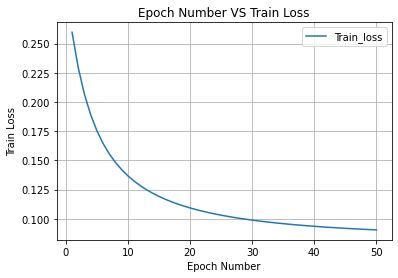

In [ ]:
import matplotlib.pyplot as plt
epoch_lst = [i for i in range(1, 51)]
plt.plot(epoch_lst,train_loss,label = 'Train_loss') 
plt.legend()
plt.grid()
plt.title('Epoch Number VS Train Loss') 
plt.xlabel('Epoch Number') 
plt.ylabel('Train Loss')
plt.show()

In [ ]:
f_test=clf.decision_function(x_test)
f_test[:10]

array([-2.34123274, -1.56640185,  1.22607421, -3.95053852, -2.74862018,
       -1.40902312,  1.69911625, -2.8539968 ,  0.80039616, -2.93981534])

* For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [ ]:
prob_value_list = [] 
for x_q in f_test:
  res=1/(1+np.exp(-w*x_q-b)) 
  prob_value_list.append(res)
print(prob_value_list)

[0.05280934488490812,
 0.12099467488560041,
 0.7814468542762315,
 0.008459941996148012,
 0.03350467051023587,
 0.1419147615401363,
 0.8612698586219156,
 0.02974483479796233,
 0.685163549197528,
 0.02698803131841617,
 0.06565955182571563,
 0.00531407520782944,
 0.2861476254234422,
 0.03030166900850771,
 0.1556514423562347,
 0.0009515467563463711,
 0.07683731560071187,
 0.5066736056431985,
 0.9259421829132217,
 0.01966578932825423,
 0.33780305189572757,
 0.059440461588572434,
 0.0243343916065324,
 0.17400236820915962,
 0.011709479720719777,
 0.0950018696220894,
 0.08266000539480318,
 0.03527464909829068,
 0.021173306588073877,
 0.047140881702497146,
 0.5108521034894725,
 0.01821836439426924,
 0.9542750006405921,
 0.13225167324526327,
 0.28588023599874834,
 0.46537789087152237,
 0.11007380967566113,
 0.8303677264241748,
 0.946545879776031,
 0.7022580800912552,
 0.4201805257015786,
 0.983315657627977,
 0.07508600118783158,
 0.04727442466638495,
 0.9091863296805651,
 0.042384555423445054,
 